<a href="https://colab.research.google.com/github/DADesai/MSBA/blob/main/MSBA_DDM/Code/Solution_Akannis_Chin_Chin_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

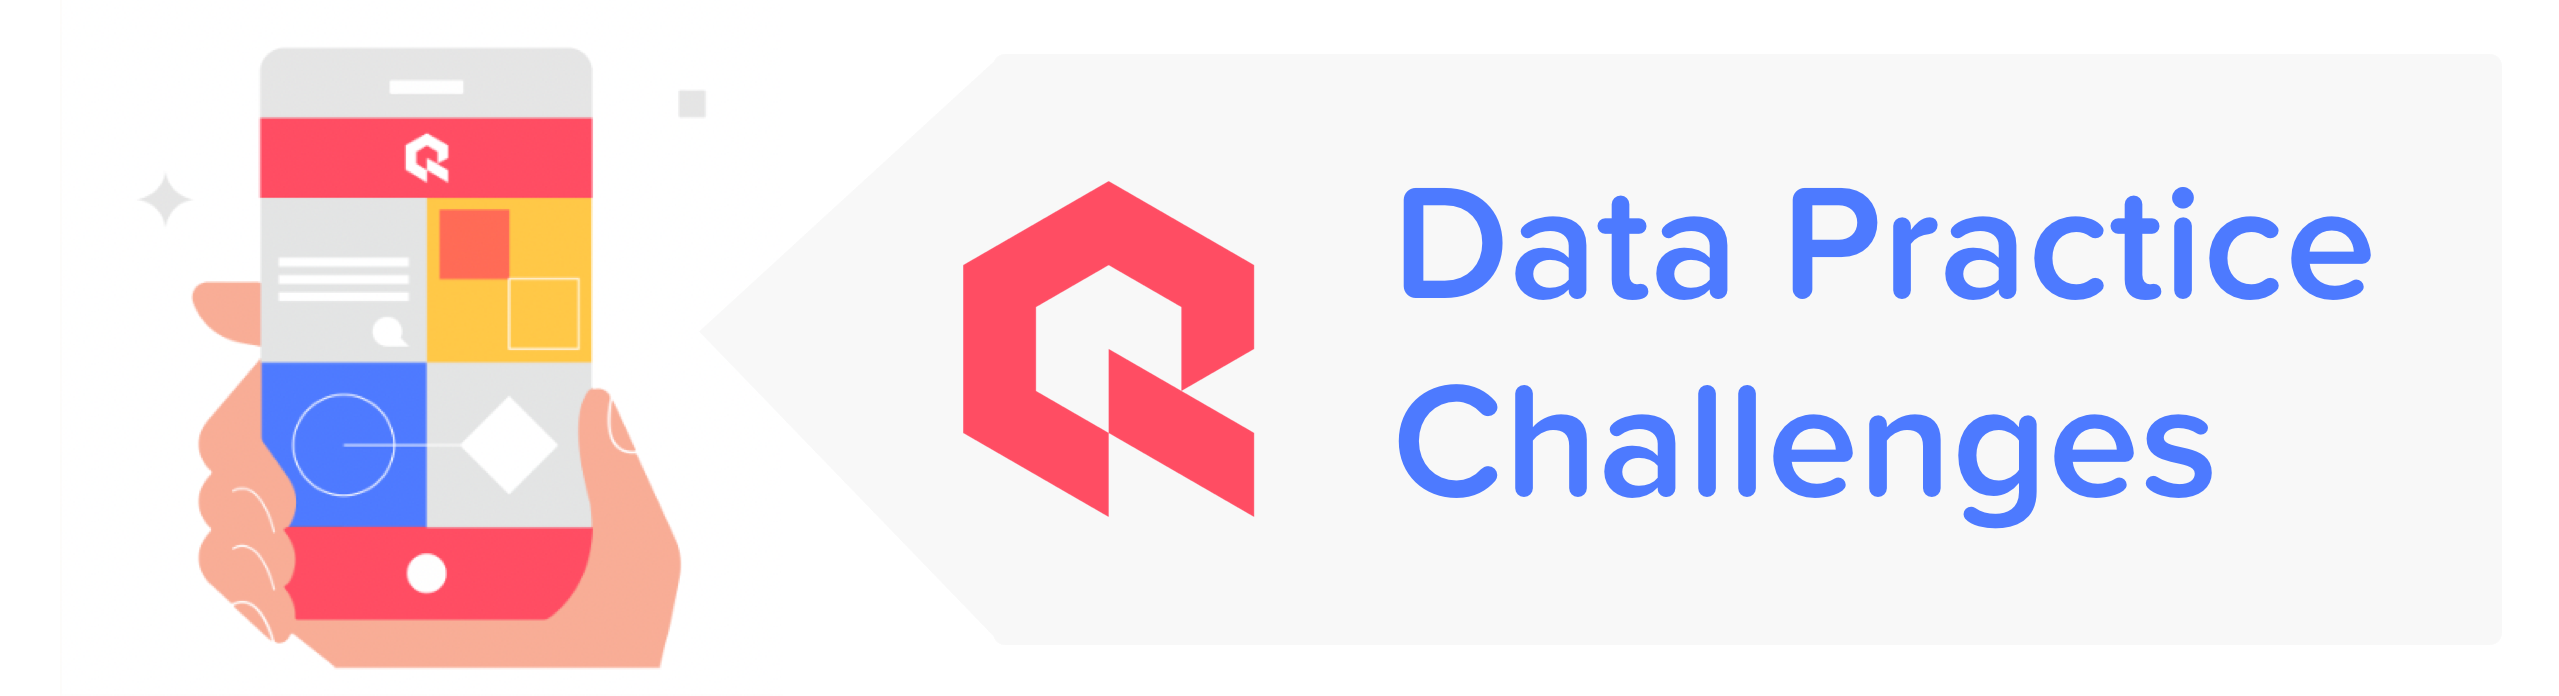

# **Mini Case Study: Customer Segmentation for Akanni's Chin Chin Business**

#Scenario

Akanni's chin chin business quickly became a viral sensation across Nigeria, garnering widespread popularity and customer loyalty. Recognizing the potential for growth, Akanni expanded her business model into a cloud kitchen empire, efficiently catering to a vast and diverse customer base. With the rapid expansion and increased customer data, Akanni faced the challenge of understanding and segmenting her diverse clientele to tailor her offerings more effectively.

To address this, Akanni turned to K-means clustering, a robust machine learning technique for customer segmentation. By leveraging K-means clustering, Akanni could analyze large volumes of customer data, including purchase history, preferences, frequency of orders, and geographic location. This analytical approach allowed her to identify distinct customer segments. With these insights, Akanni could personalize marketing strategies, optimize menu offerings, and enhance customer satisfaction, ultimately driving sustained growth and a competitive edge in the dynamic food industry.

Use the [dataset](https://github.com/DADesai/MSBA/blob/main/MSBA_DDM/Data/chin_chin_customer_data.csv) and conduct the K-means clustering for customer segmentation of Akanni's Chin Chin business.


#Technical Challenges:

You are welcome to use ChatGPT or other AI tools to solve the challenges below.


1. Data Exploration and Preprocessing:

Explore the dataset to understand the distribution of variables.
Perform any necessary data preprocessing steps (e.g., scaling).

2. Choosing the Number of Clusters:

Use the Elbow Method to determine the optimal number of clusters for segmentation.

3. Model Building:

Apply K-means clustering to segment the customers.
Analyze the characteristics of each cluster.

4. Visualization:

Visualize the clusters in a 2D or 3D plot.
Interpret the clusters in the context of customer segmentation.

#Discussion Questions

Discuss with your team members:

Will the implementation of K-means clustering enable Akanni to streamline her operations?

Can it also help make strategic data-driven decisions?

What can be their next step in implementing advanced analytics, data science, AI/ML?


Below, we'll show a possible solution for the technical challenges.






##Technical Solution

In [14]:
# Challenge-1 Solution

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('chin_chin_customer_data.csv')
df.head()

# Data Exploration and Preprocessing
df.describe()


Age  Annual Income (USD)  Spending Score
count  1000.000000          1000.000000     1000.000000
mean     43.267000         49892.455577       48.192000
std      15.242311         14841.628440       28.466533
min      18.000000           988.660890        1.000000
25%      30.000000         39579.687425       24.000000
50%      43.000000         50118.659756       48.000000
75%      56.000000         59991.237874       71.000000
max      69.000000         91355.595331       99.000000

from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Annual Income (USD)'].plot(kind='hist', bins=20, title='Annual Income (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Spending Score'].plot(kind='hist', bins=20, title='Spending Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Age', y='Annual Income (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Annual Income (USD)', y='Spending Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Annual Income (USD)'].plot(kind='line', figsize=(8, 4), title='Annual Income (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Spending Score'].plot(kind='line', figsize=(8, 4), title='Spending Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

 In K-means clustering, the distance between data points is crucial. Features with larger scales can dominate the distance calculations, leading to biased clustering results. Therefore in the step above, we stardardized the data. Standardizing ensures that all features contribute equally to the clustering process, improving the performance and accuracy of the K-means algorithm.

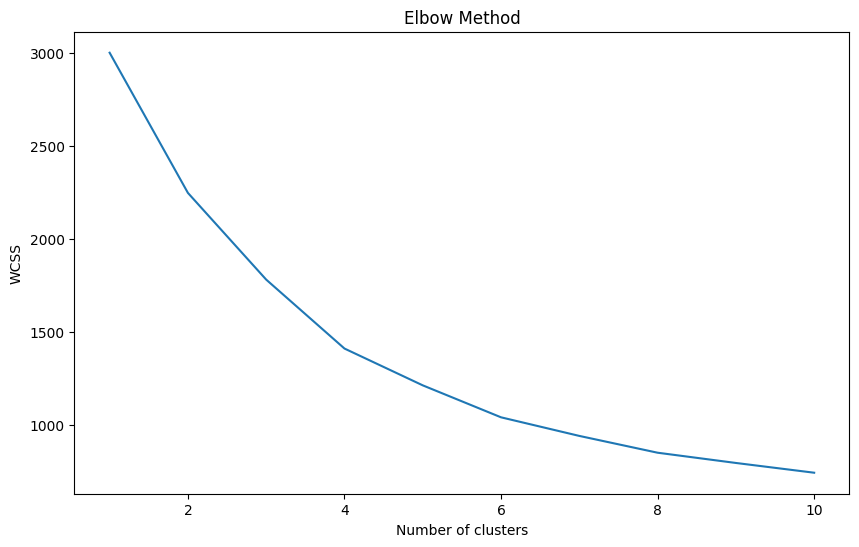

In [10]:
# Challenge-2 Solution

# Choosing the Number of Clusters
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The Elbow Method helps determine the optimal number of clusters in K-means clustering by plotting the within-cluster sum of squares (WCSS) against the number of clusters (k). The optimal number is at the "elbow point" of the plot, where the rate of decrease in WCSS sharply changes, indicating a balance between minimizing WCSS and avoiding overfitting. In this case, the elbow is observed at 4 clusters, suggesting that 4 is the optimal number, as adding more clusters beyond this point yields diminishing returns in reducing WCSS.

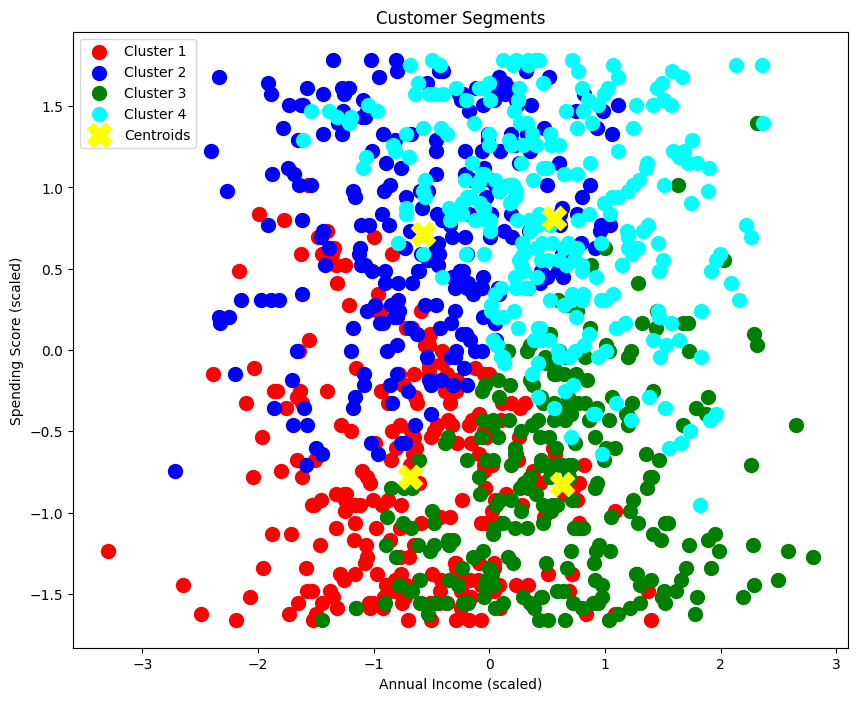

In [22]:
## Challenge-3 Solution

# Model Building
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

# Visualization
# Visualizing the clusters in 2D
# Visualization in 2D using 'Annual Income' and 'Spending Score'
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled[y_kmeans == 0, 1], df_scaled[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1, 1], df_scaled[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2, 1], df_scaled[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3, 1], df_scaled[y_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

Cluster Descriptions

Cluster 1: Low to medium income, high spending - frequent spenders, value-conscious.

Cluster 2: Medium to high income, moderate spending - balanced spenders, value quality.

Cluster 3: Medium income, low spending - conservative spenders, budget-conscious.

Cluster 4: High income, high spending - affluent spenders, luxury-focused.

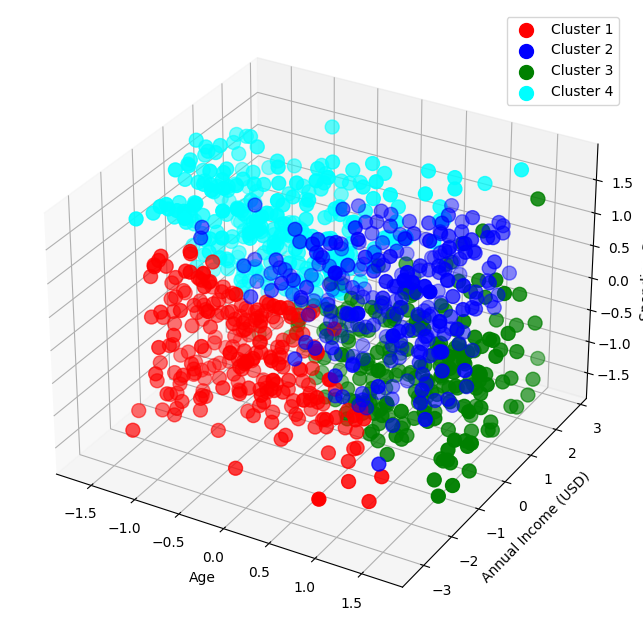

In [17]:
#Challenge-4 Solution

# Visualization
# Visualizing the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], df_scaled[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], df_scaled[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], df_scaled[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], df_scaled[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (USD)')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

The 3D plot visually confirms that the clusters are well-separated, indicating that the K-means algorithm has effectively segmented the customers into distinct groups.

Cluster 1: Young, lower income, high spending.

Cluster 2: Middle-aged, medium to high income, moderate spending.

Cluster 3: Older, medium income, low spending.

Cluster 4: Young to middle-aged, high income, high spending.

## Discussion Insights

By segmenting her customers effectively, Akanni's cloud kitchen empire can offer targeted promotions, introduce region-specific flavors, and improve overall customer engagement. High-spending clusters can receive personalized marketing and exclusive deals, while budget-conscious segments can be targeted with value-oriented campaigns. This strategic use of data analytics ensures promotional efforts are aligned with customer needs, optimizing marketing investments and enhancing customer satisfaction.

Moreover, understanding regional preferences allows Akanni to localize flavors and manage inventory efficiently, reducing waste and increasing customer satisfaction. Tailored communication strategies and personalized customer experiences can boost retention rates and foster loyalty. Leveraging advanced technologies like K-means clustering enables data-driven decision-making, driving sustainable growth and providing a competitive edge in the dynamic market.

Looking ahead, Akanni's technology roadmap should focus on integrating more advanced analytics and AI-driven insights to stay ahead of market trends and customer preferences. The next step involves implementing predictive analytics to anticipate customer behavior and demand patterns, as well as exploring machine learning models for more nuanced segmentation. Additionally, incorporating real-time data analytics can enable dynamic pricing strategies and personalized recommendations. By continuously refining her data strategies and leveraging cutting-edge technologies, Akanni can maintain a competitive edge, foster deeper customer loyalty, and drive sustained growth in the evolving food industry.

## Credits

This mini case study was developed by Darshan Desai, edited by Ben Taylor, and leveraged insights generated by ChatGPT.